## Project Days Data Analysis

This notebook presents analysis of project days' data.

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.decomposition import FactorAnalysis

In [2]:
# Opening the csv file
data = pd.read_csv('Data_16nov.csv')

# Deleting the first columns of sequence number
data.drop(data.columns[0],axis=1,inplace=True)

# Printing basic info of dataset
print 'Number of records:',data.shape[0]
print 'Number of attributes:',data.shape[1]


# Printing Column names
print([a for a in data.columns])

Number of records: 77
Number of attributes: 12
['timestamp', 'group', 'disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']


In [3]:
print 'Total number of Groups:',data.group.nunique()
groups=[g for g in pd.unique(data.group)]
print 'Groups:',groups

Total number of Groups: 10
Groups: ['1AB', '1CD', '1GF', '1HI', '2ABC', '2DE', '2FGH', '2IJ', '3AB', '3CD']


In [74]:
obvData = data.iloc[:,2:8]
data.head()

,timestamp,group,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
0,2017-10-18 10:15:16,1AB,0.0,0.0,1.0,1.0,0.0,0.0,2,0,0,0
1,2017-10-18 10:20:11,1AB,0.0,0.0,1.0,1.0,0.0,0.0,6,8,11,0
2,2017-10-18 10:25:04,1AB,0.0,0.0,1.0,0.5,1.0,1.0,0,0,0,0
3,2017-10-18 10:30:19,1AB,0.0,0.5,1.0,0.5,1.0,0.5,3,2,0,0
4,2017-10-18 10:35:21,1AB,0.0,0.5,1.0,1.0,0.0,0.0,0,0,0,0


## Clustering on data

### Dimensionality reduction on Observation data

This section try to find the clustering pattern after applying various dimensionality reduction algorithms on observational data. Following are the techniques which are employed for this purpose
1. PCA
2. Isomap

In [31]:
%matplotlib inline

<IPython.core.display.Javascript object>


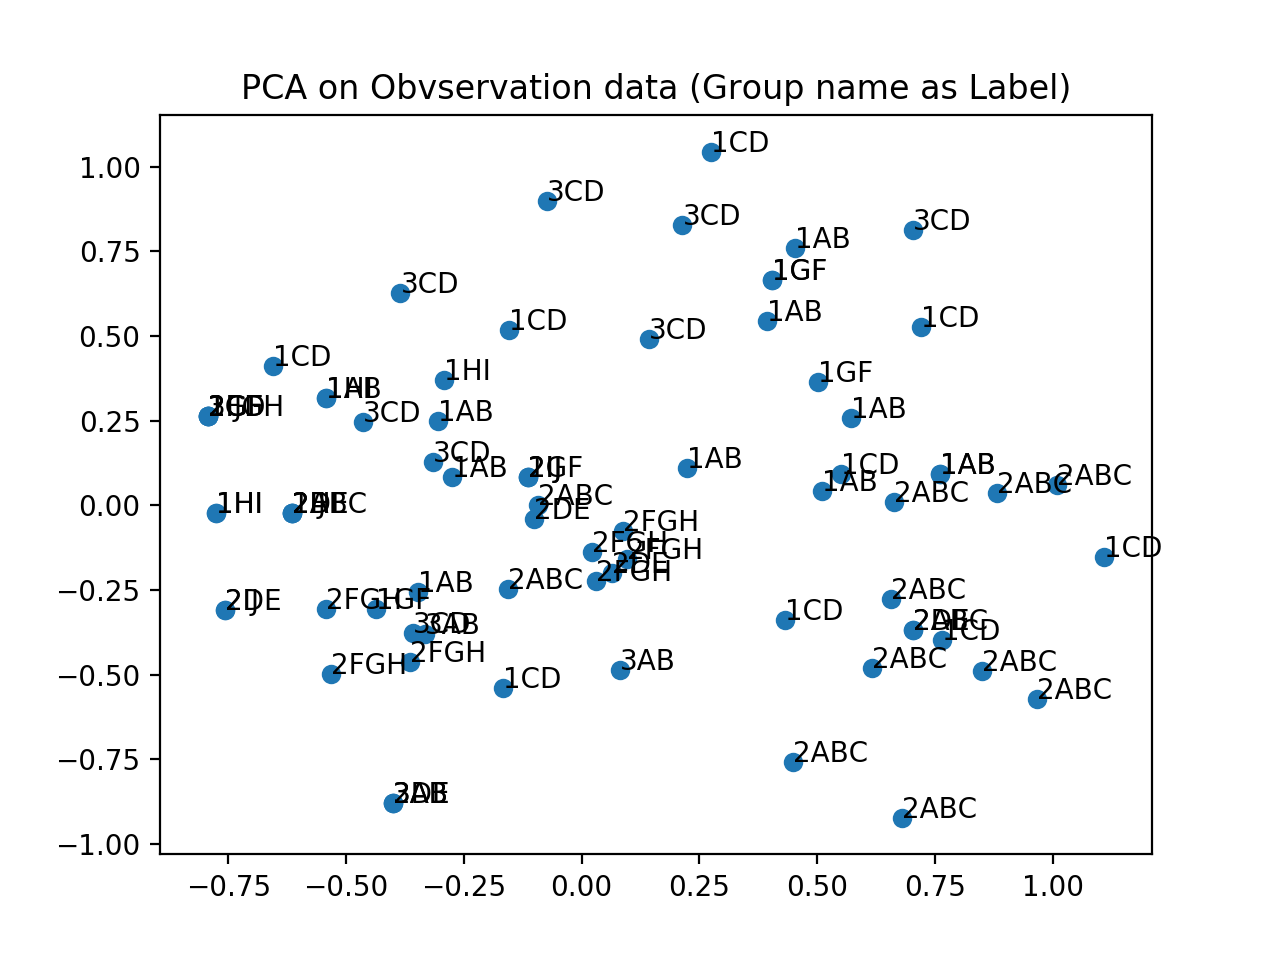

In [42]:
# Applying PCA on Observational data ( into 2 dimensional data)

pca = decomposition.PCA(n_components = 2)
pca.fit(obvData)
obvData2d = pca.transform(obvData)

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(obvData2d[:,0],obvData2d[:,1])

for i in range(len(obvData2d)):
    ax.annotate(data.iloc[i,1],xy=(obvData2d[i,0],obvData2d[i,1]),xytext=(obvData2d[i,0],obvData2d[i,1]))
plt.title('PCA on Obvservation data (Group name as Label)')
plt.show()

<IPython.core.display.Javascript object>


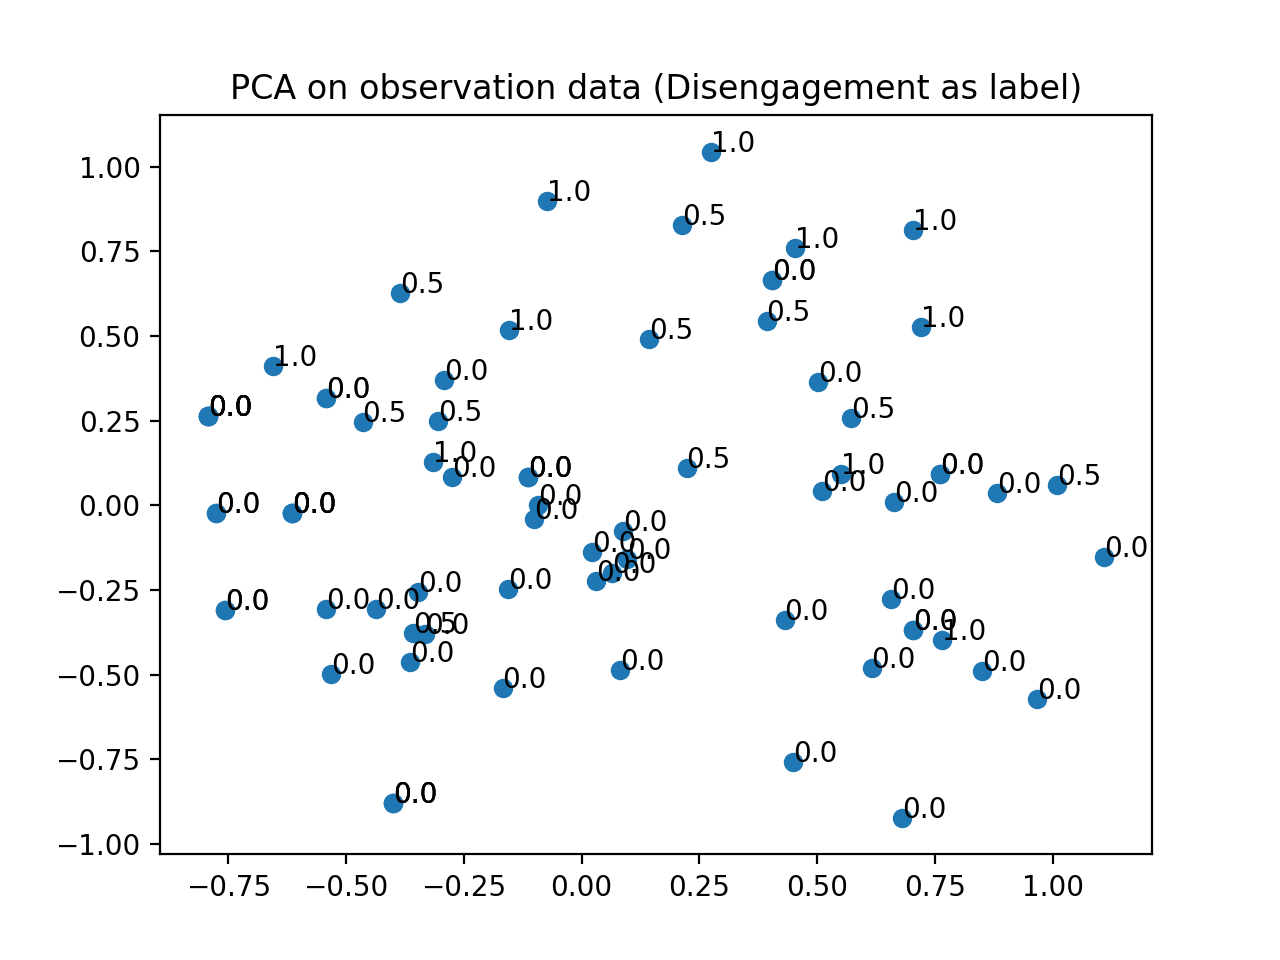

In [49]:
# Applying PCA on Observational data ( into 2 dimensional data)

pca = decomposition.PCA(n_components = 2)
pca.fit(obvData)
obvData2d = pca.transform(obvData)

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(obvData2d[:,0],obvData2d[:,1])

for i in range(len(obvData2d)):
    ax.annotate(data.iloc[i,2],xy=(obvData2d[i,0],obvData2d[i,1]),xytext=(obvData2d[i,0],obvData2d[i,1]))
plt.title('PCA on observation data (Disengagement as label)')
plt.show()

In [ ]:
### Applying K-Means on PCA data(2d)

<IPython.core.display.Javascript object>


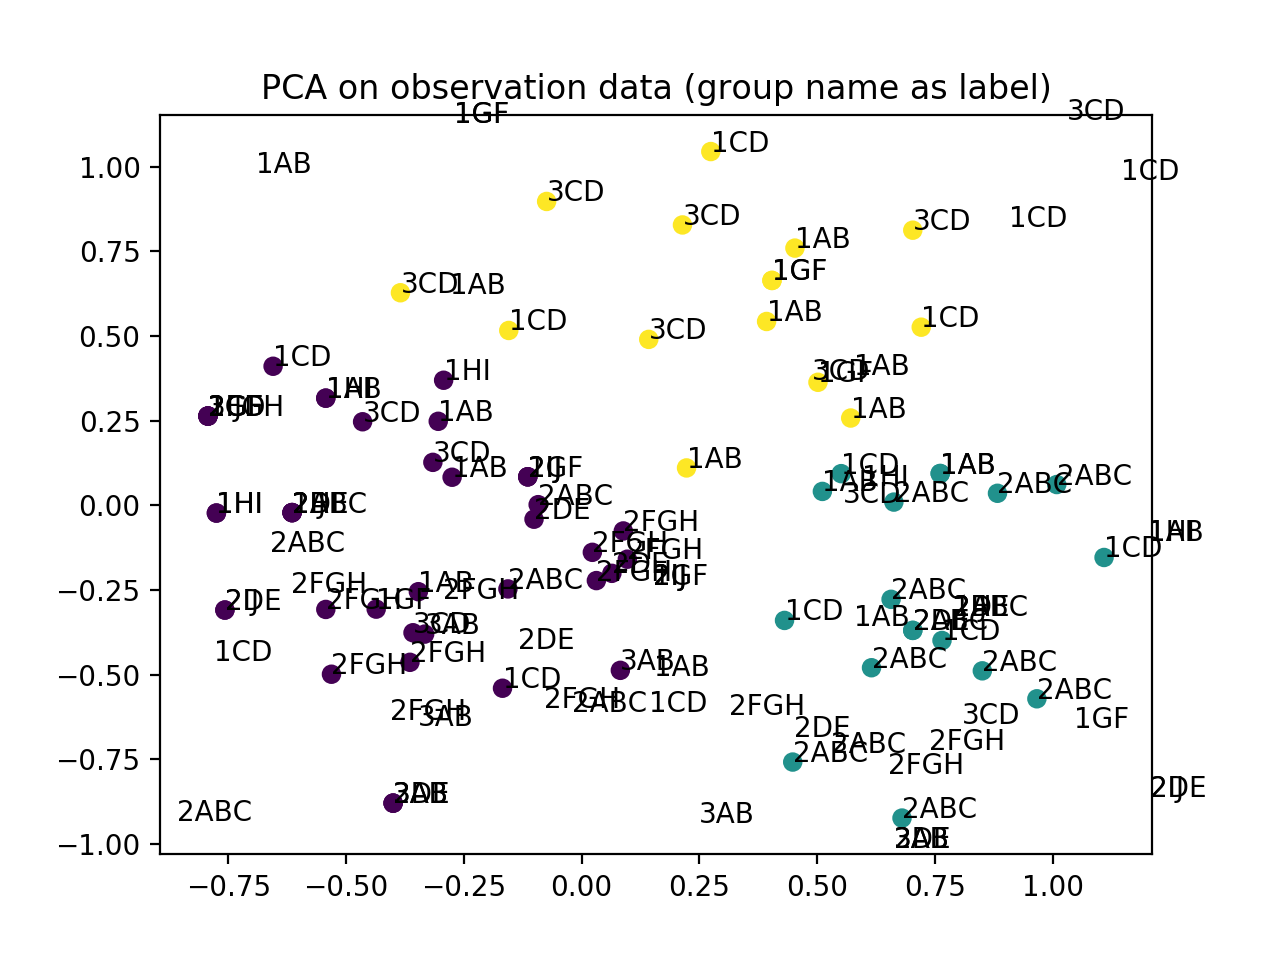

In [67]:
# Applying K-means on the 2D data

kmeans = KMeans(n_clusters=3)
kmeans.fit(obvData2d)
kmeans.labels_

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(obvData2d[:,0],obvData2d[:,1],c=kmeans.predict(obvData2d))

for i in range(len(obvData2d)):
    ax.annotate(data.iloc[i,1],xy=(obvData2d[i,0],obvData2d[i,1]),xytext=(obvData2d[i,0],obvData2d[i,1]))
plt.title('PCA on observation data (group name as label)')
plt.show()

In [33]:
%matplotlib notebook

<IPython.core.display.Javascript object>


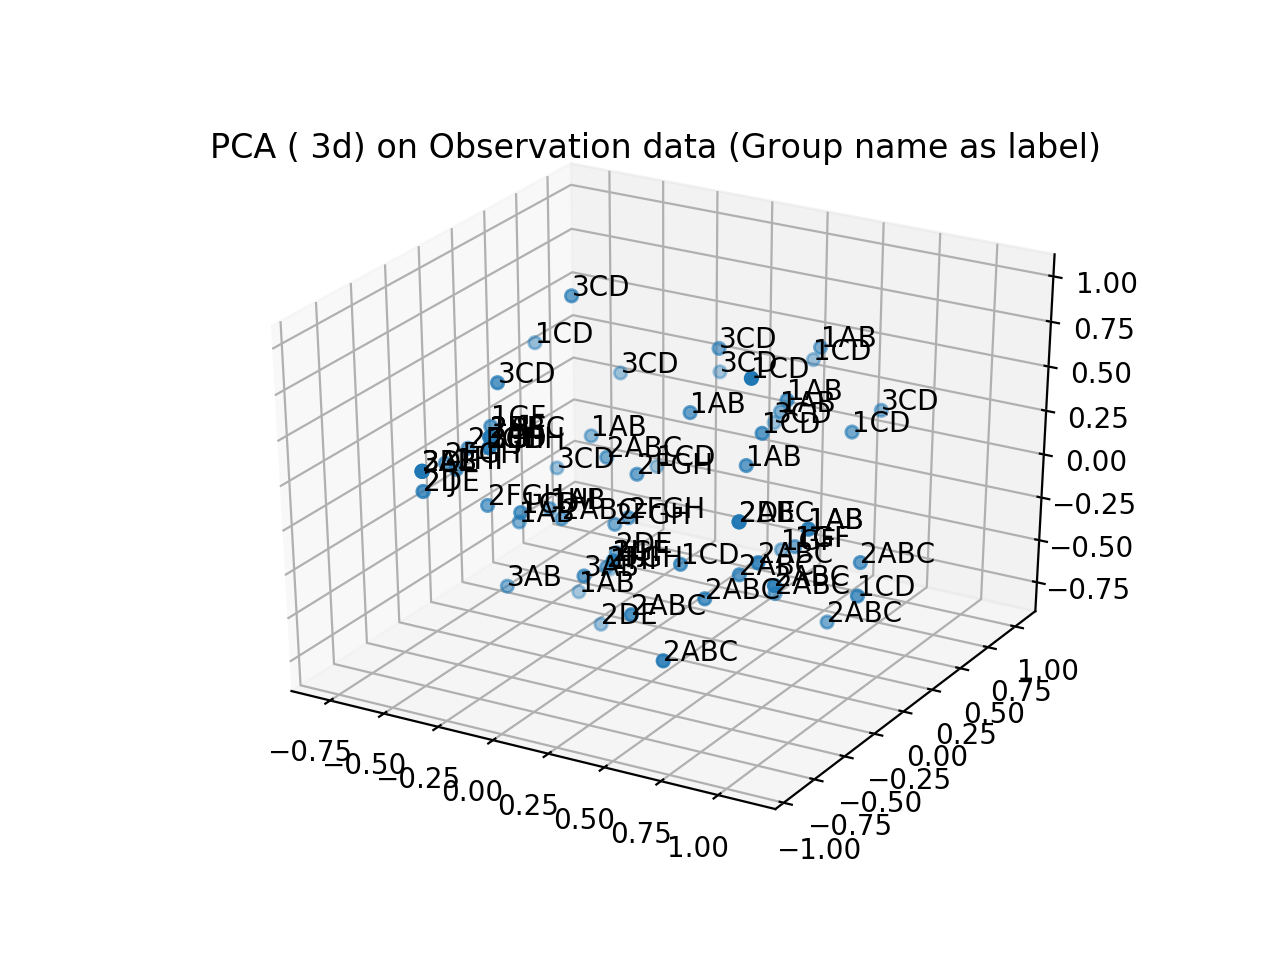

In [44]:
# Applying PCA on Observational data ( into 3 dimensional data)

pca = decomposition.PCA(n_components = 3)
pca.fit(obvData)
obvData3d = pca.transform(obvData)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(obvData3d[:,0],obvData3d[:,1],obvData3d[:,2])

i=0
for x,y,z in zip(obvData3d[:,0],obvData3d[:,1],obvData3d[:,2]):
    label = data.iloc[i,1]
    ax.text(x,y,z,label,None)
    i=i+1
plt.title('PCA ( 3d) on Observation data (Group name as label)')
plt.show()

<IPython.core.display.Javascript object>


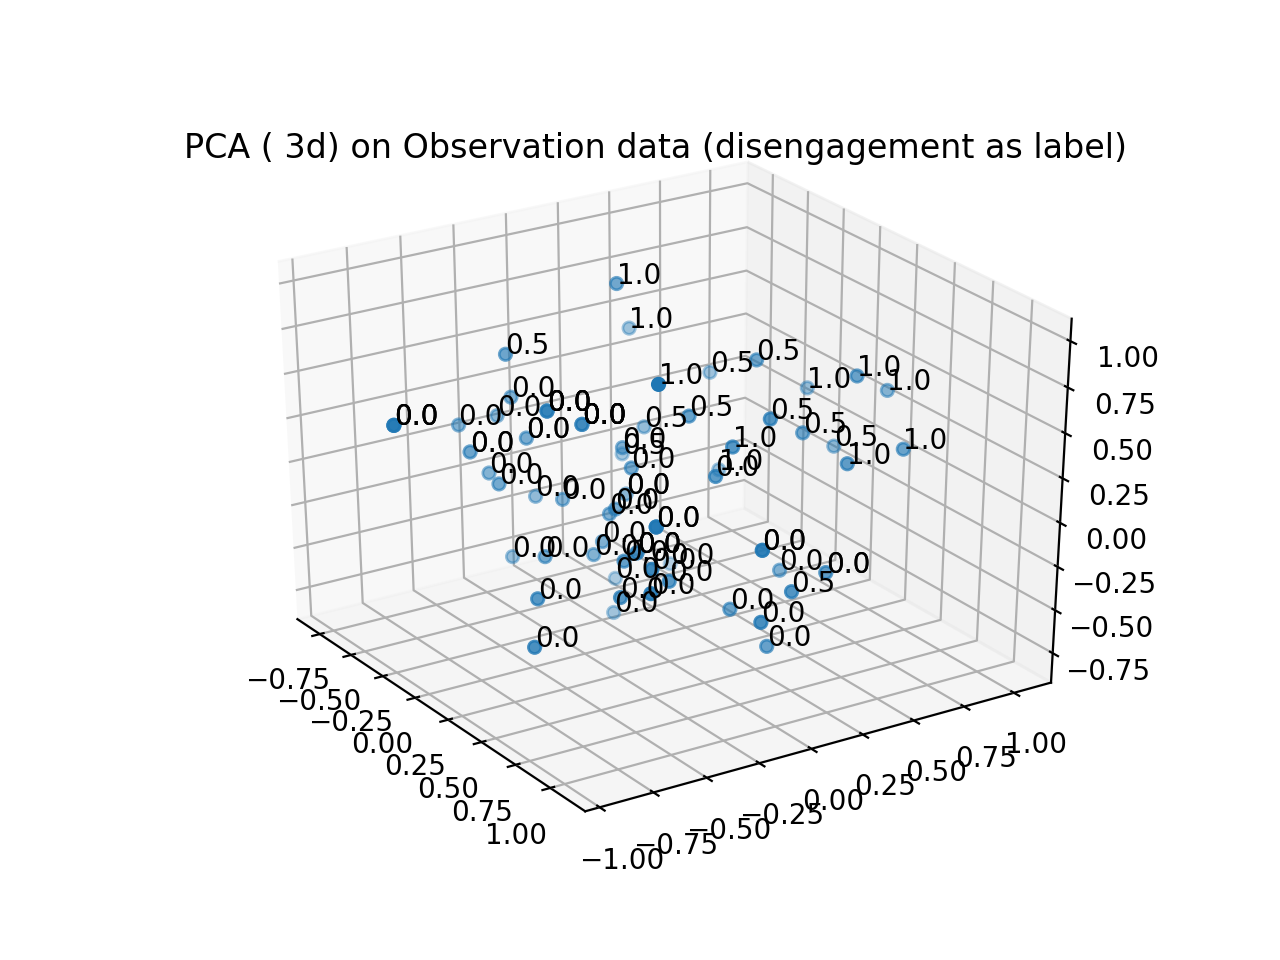

In [46]:
# Applying PCA on Observational data ( into 3 dimensional data)

pca = decomposition.PCA(n_components = 3)
pca.fit(obvData)
obvData3d = pca.transform(obvData)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(obvData3d[:,0],obvData3d[:,1],obvData3d[:,2])

i=0
for x,y,z in zip(obvData3d[:,0],obvData3d[:,1],obvData3d[:,2]):
    label = data.iloc[i,2]
    ax.text(x,y,z,label,None)
    i=i+1
plt.title('PCA ( 3d) on Observation data (disengagement as label)')
plt.show()


<IPython.core.display.Javascript object>


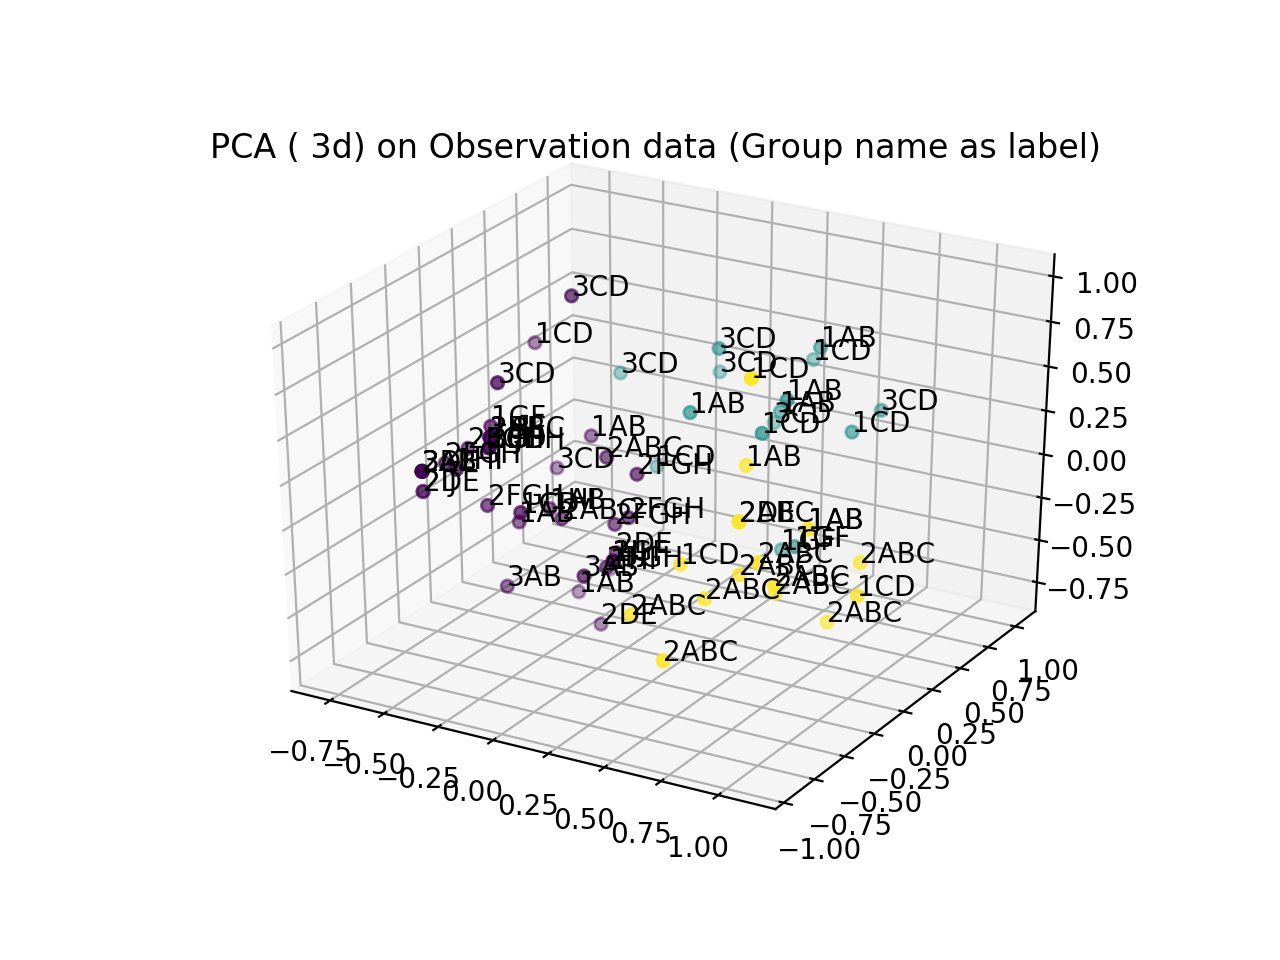

In [65]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(obvData3d)
kmeans1.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(obvData3d[:,0],obvData3d[:,1],obvData3d[:,2],c=kmeans1.predict(obvData3d))

i=0
for x,y,z in zip(obvData3d[:,0],obvData3d[:,1],obvData3d[:,2]):
    label = data.iloc[i,1]
    ax.text(x,y,z,label,None)
    i=i+1
plt.title('PCA ( 3d) on Observation data (Group name as label)')
plt.show()

## Isomap dimentionality reduction
In this section, I am trying to apply isomap dimentionality reduction technique on data.

In [69]:
isomap = Isomap(n_components = 2)
iso_data2d = isomap.fit_transform(obvData)

<IPython.core.display.Javascript object>


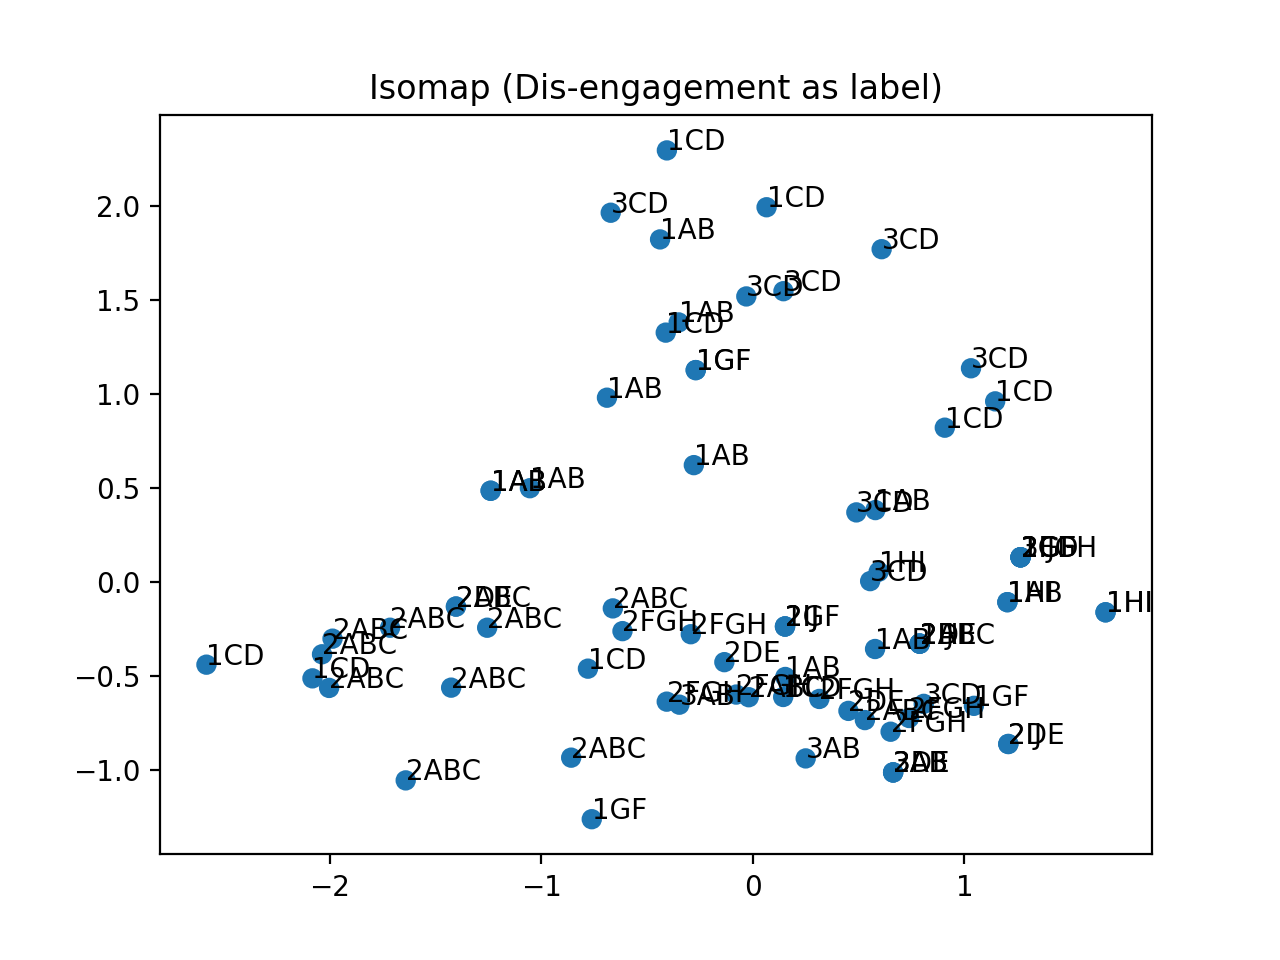

In [88]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(iso_data2d[:,0],iso_data2d[:,1],s=[20*2]*len(data))


for i in range(len(iso_data2d)):
    ax3.annotate(data.iloc[i,1],xy=(iso_data2d[i,0],iso_data2d[i,1]),xytext=(iso_data2d[i,0],iso_data2d[i,1]))
plt.title('Isomap (Dis-engagement as label)')
plt.show()

<IPython.core.display.Javascript object>


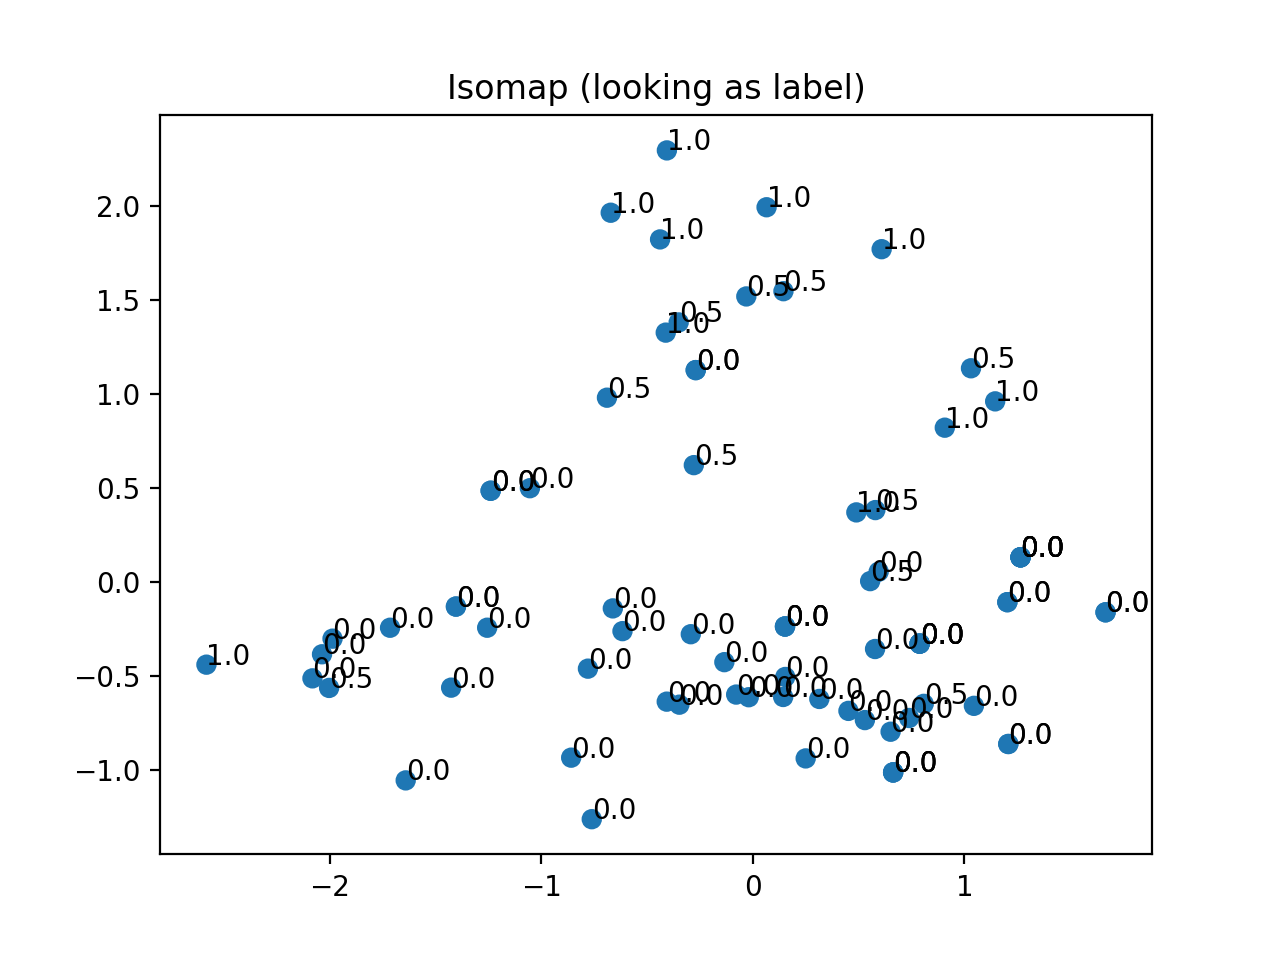

In [82]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(iso_data2d[:,0],iso_data2d[:,1],s=[20*2]*len(data))


for i in range(len(iso_data2d)):
    ax3.annotate(data.iloc[i,2],xy=(iso_data2d[i,0],iso_data2d[i,1]),xytext=(iso_data2d[i,0],iso_data2d[i,1]))
plt.title('Isomap (looking as label)')
plt.show()

<IPython.core.display.Javascript object>


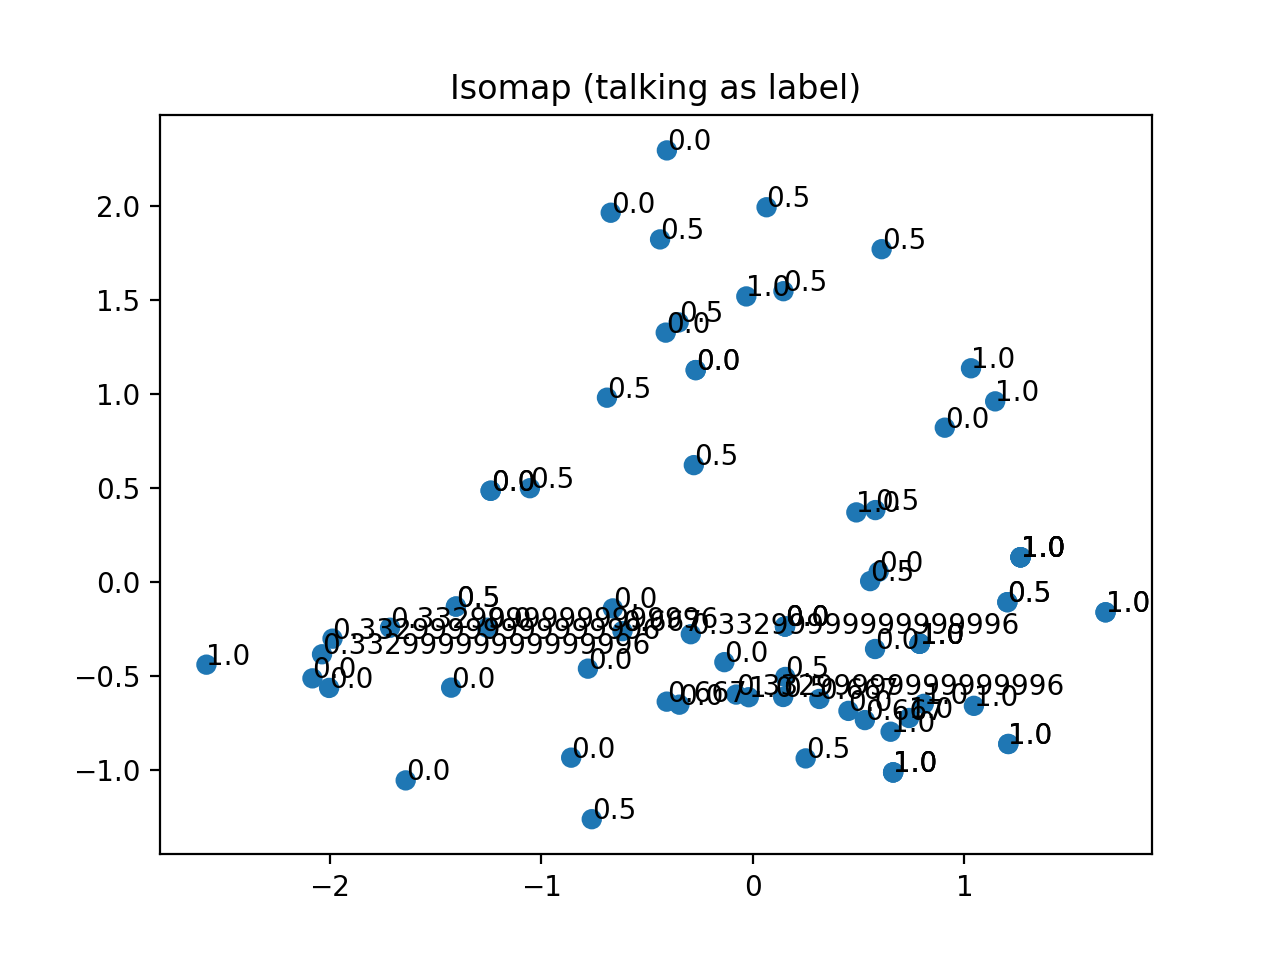

In [89]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(iso_data2d[:,0],iso_data2d[:,1],s=[20*2]*len(data))


for i in range(len(iso_data2d)):
    ax3.annotate(data.iloc[i,3],xy=(iso_data2d[i,0],iso_data2d[i,1]),xytext=(iso_data2d[i,0],iso_data2d[i,1]))
plt.title('Isomap (talking as label)')
plt.show()

<IPython.core.display.Javascript object>


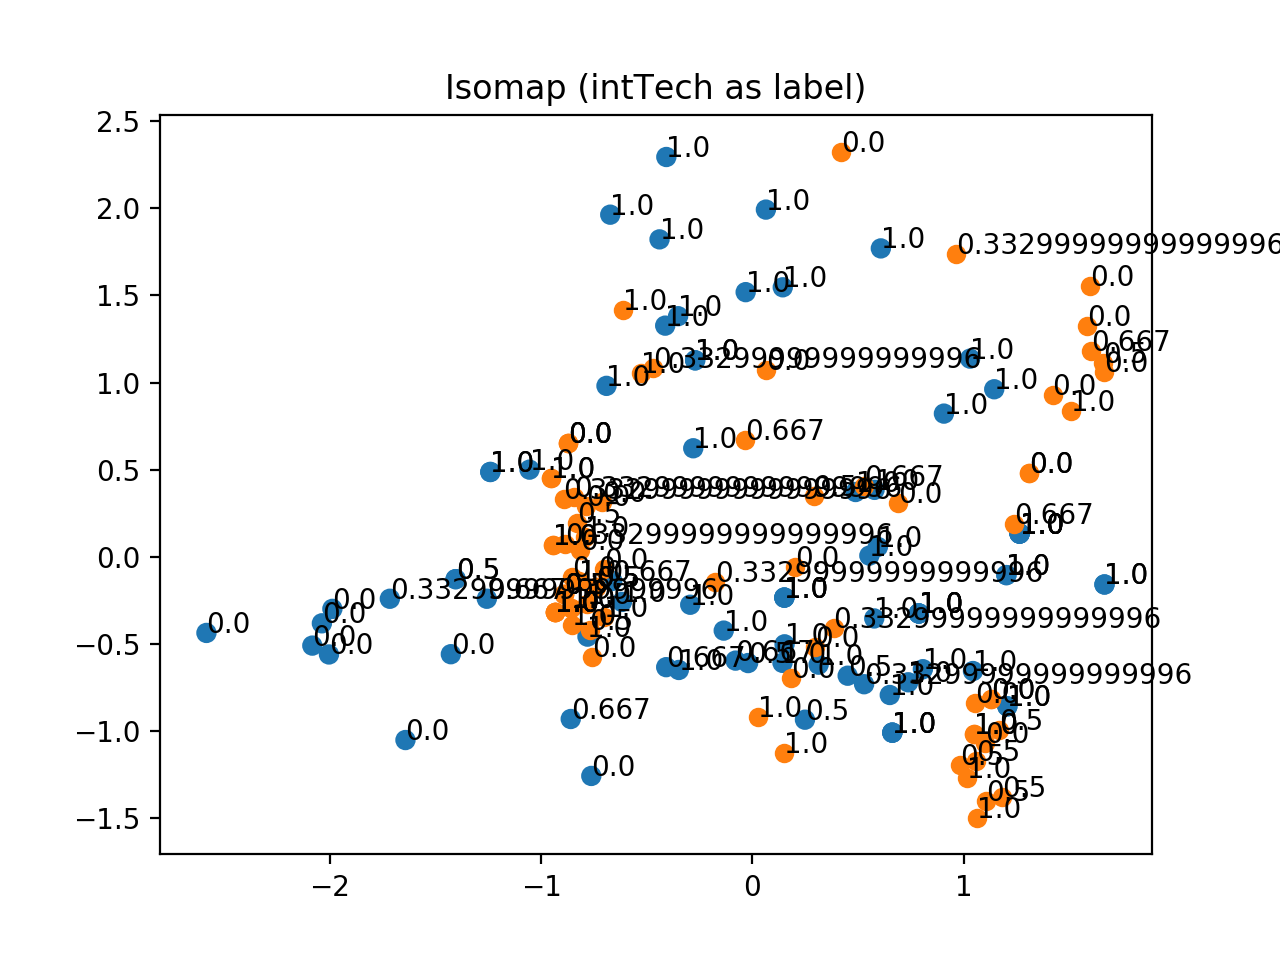

In [90]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(iso_data2d[:,0],iso_data2d[:,1],s=[20*2]*len(data))


for i in range(len(iso_data2d)):
    ax3.annotate(data.iloc[i,4],xy=(iso_data2d[i,0],iso_data2d[i,1]),xytext=(iso_data2d[i,0],iso_data2d[i,1]))
plt.title('Isomap (intTech as label)')
plt.show()

<IPython.core.display.Javascript object>


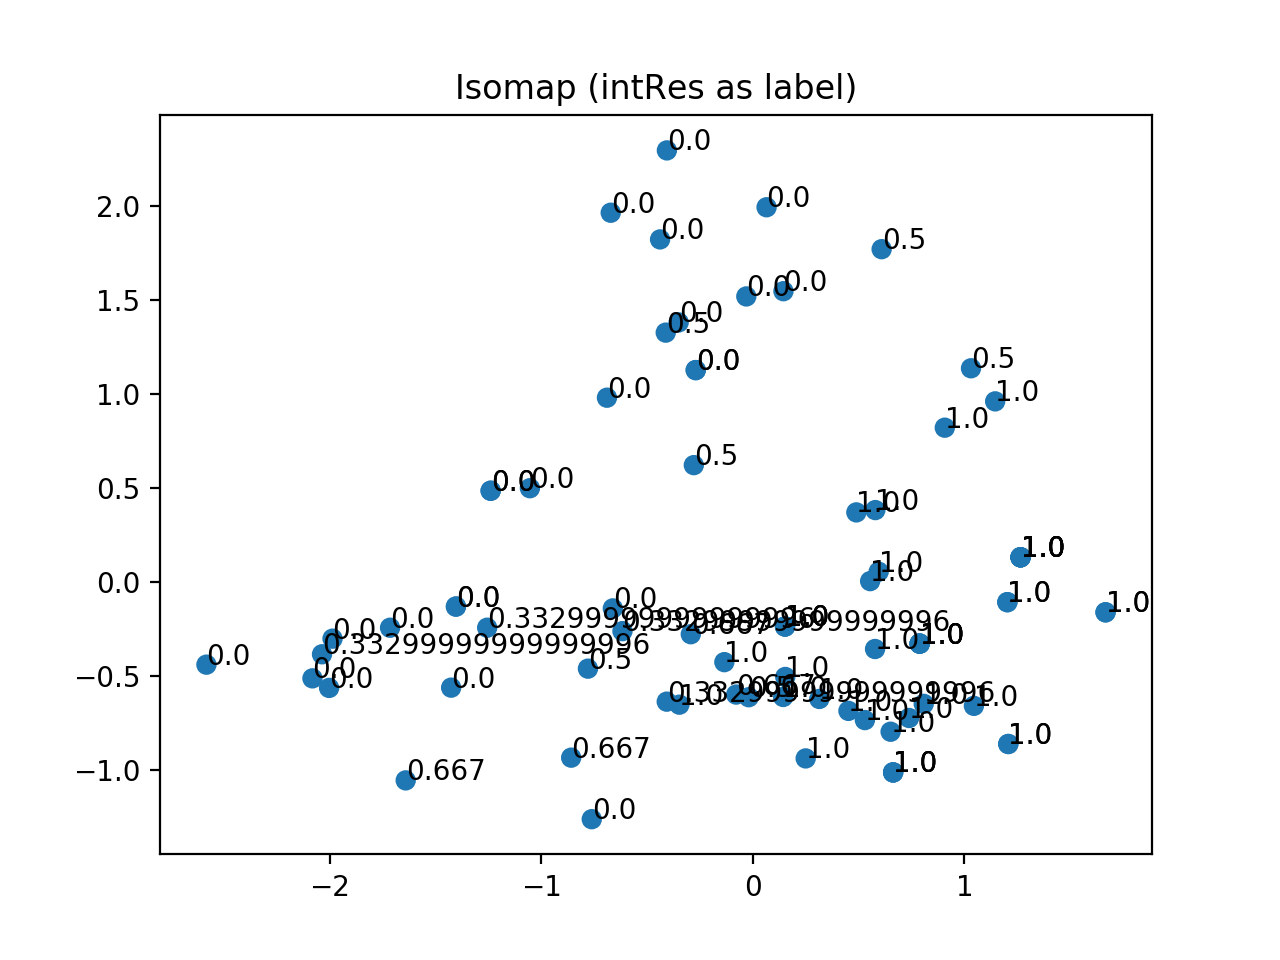

In [86]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(iso_data2d[:,0],iso_data2d[:,1],s=[20*2]*len(data))


for i in range(len(iso_data2d)):
    ax3.annotate(data.iloc[i,6],xy=(iso_data2d[i,0],iso_data2d[i,1]),xytext=(iso_data2d[i,0],iso_data2d[i,1]))
plt.title('Isomap (intRes as label)')
plt.show()

<IPython.core.display.Javascript object>


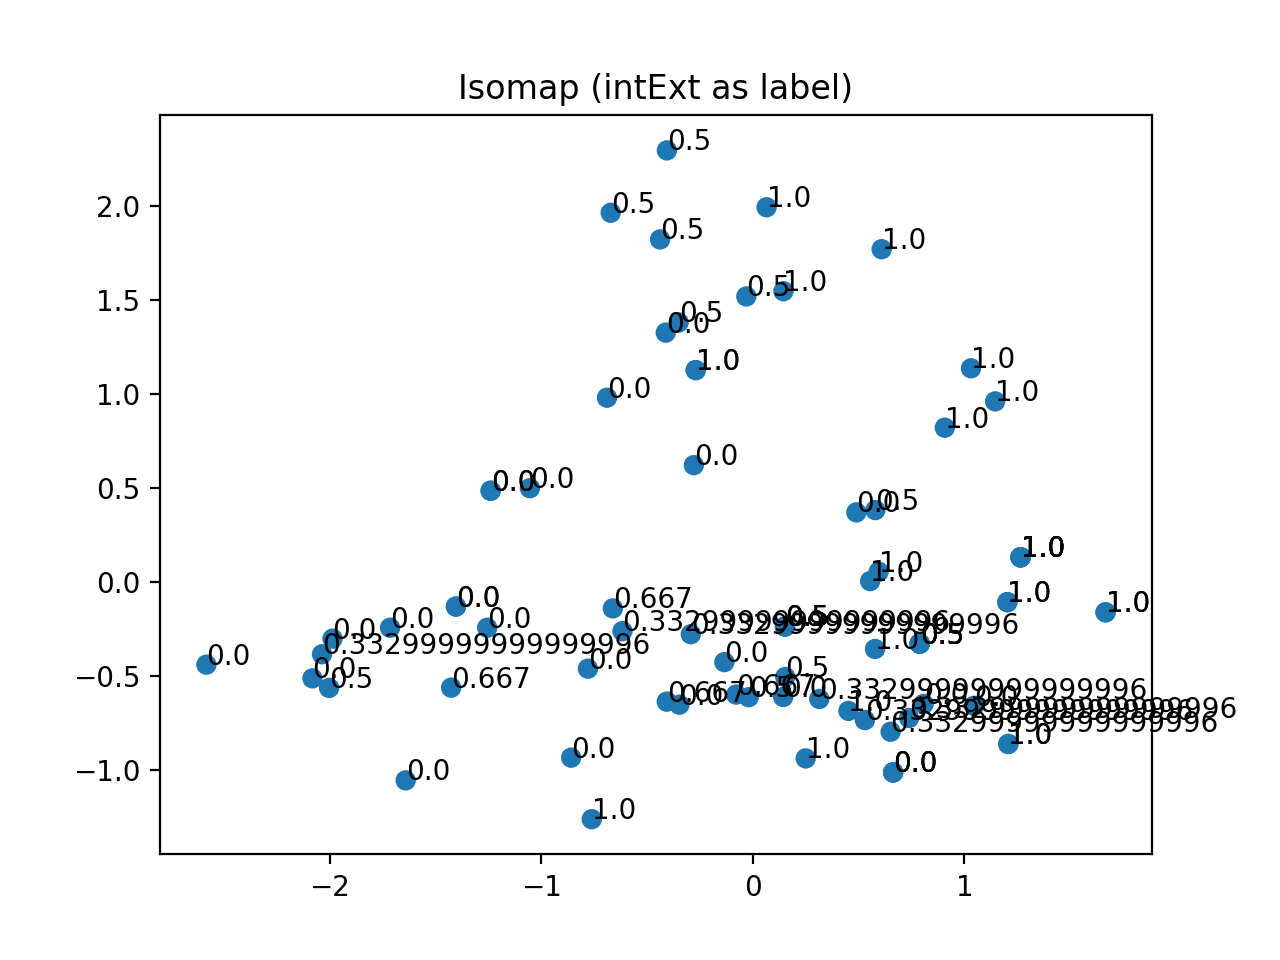

In [87]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(iso_data2d[:,0],iso_data2d[:,1],s=[20*2]*len(data))


for i in range(len(iso_data2d)):
    ax3.annotate(data.iloc[i,7],xy=(iso_data2d[i,0],iso_data2d[i,1]),xytext=(iso_data2d[i,0],iso_data2d[i,1]))
plt.title('Isomap (intExt as label)')
plt.show()

## Factor analysis on Observational data


<IPython.core.display.Javascript object>


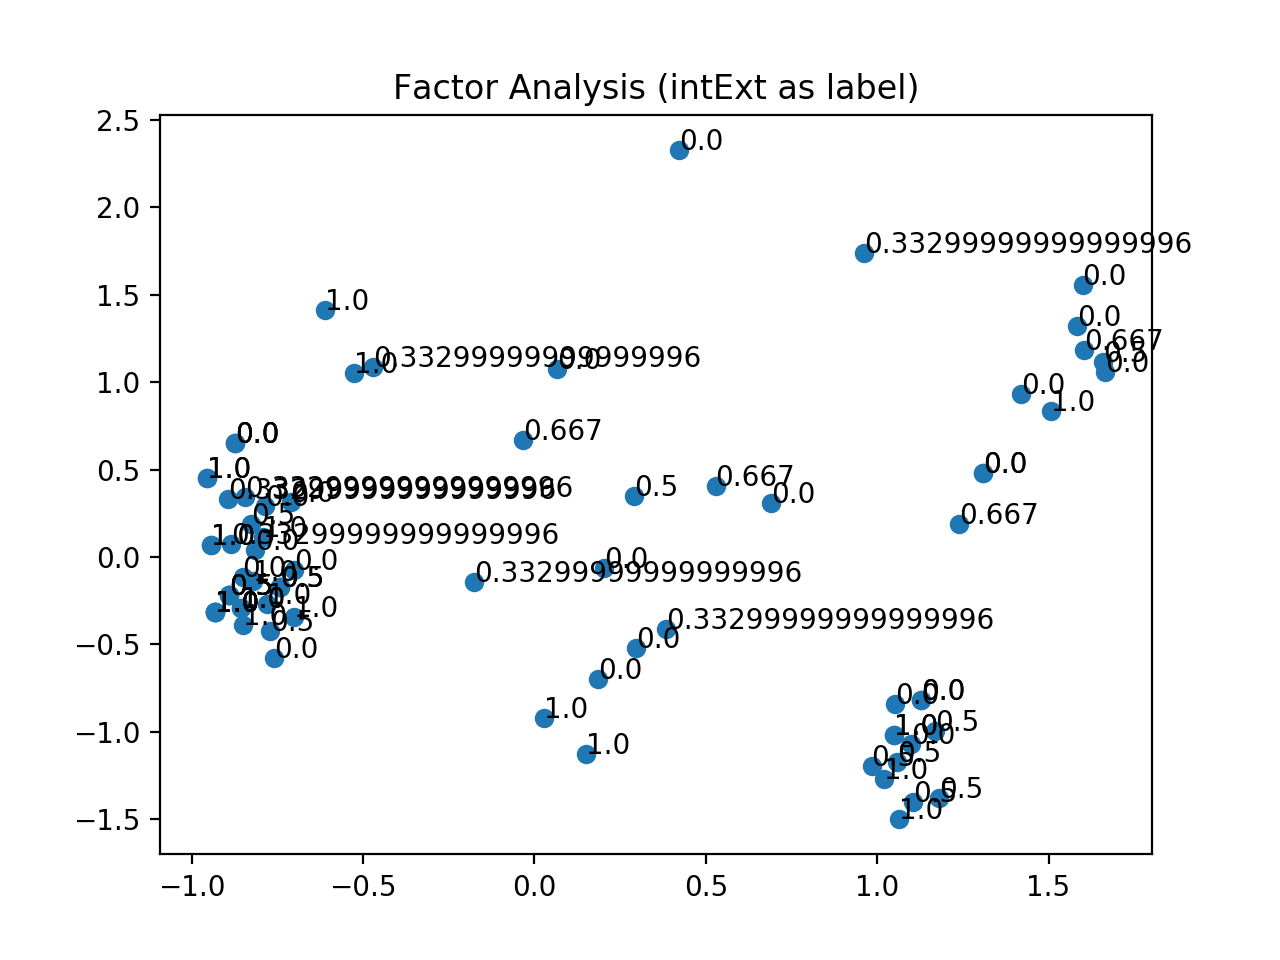

In [95]:
fa = FactorAnalysis(n_components = 2, random_state =0)
fadata2d = fa.fit_transform(obvData)

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(fadata2d[:,0],fadata2d[:,1])


for i in range(len(fadata2d)):
    ax4.annotate(data.iloc[i,7],xy=(fadata2d[i,0],fadata2d[i,1]),xytext=(fadata2d[i,0],fadata2d[i,1]))
plt.title('Factor Analysis (intExt as label)')
plt.show()

In [ ]:
print(data.loc[